# Transcriptomics data analysis

### General module import

In [1]:
# Load functions
%load_ext autoreload
%autoreload 2
from oleveler import *
# Oleveler: https://gitlab.services.universiteitleiden.nl/ibl-bioinformatic/oleveler
# Set plotting mode for notebook
%matplotlib inline
setDarkModePlotting(forceWhite=True)

# Set logger level. For more info: use logging.INFO
logshandler.setLevel(logging.INFO)

2021-11-10 10:10:07,716 [INFO] - 
Oleveler - omics data analysis tools for jupyter notebook

Version 1.0
---
by Chao DU
Institute of Biology Leiden, Leiden University, the Netherlands
c.du@biology.leidenuniv.nl
durand[dot]dc[at]hot[no space]mail.com
---


2021-11-10 10:10:07,718 [WARNING] - Change plot style to default


## Data processing

Data was generated using MaxQuant LFQ method, so we will find 'LFQ intensities' columns from the 'proteinGroups.txt' file.

In [2]:
# Load data
selfAlignCt = gatherCountTable("selfAlign/gene_counts_filtered/")
saDf = calculateTPM(selfAlignCt, 'selfAlign/gene_counts_filtered/GCF_000203835.1_ASM20383v1_genomic.gff', 
                    tagsForGeneName='locus_tag', removerRNA=True, removeIDcontains=['SCP'])

# Load meta
metaDf, conditions, experiments = loadMeta('Annotation.csv')

# Calculate mean and var
meanDf, nquantDf, varDf, stdDf, semDf = getStats(saDf, experiments)

# Transformation vst using DESeq2
vstDf = deseq2Process(selfAlignCt, metaDf, ref='WT_45')
vstMeanDf, vstNquantDf, vstVarDf, vstStdDf, vstSemDf = getStats(vstDf, experiments, title='vst')

2021-11-10 10:10:07,748 [INFO] - Raw count table gathered from selfAlign/gene_counts_filtered/
2021-11-10 10:10:07,964 [INFO] - Gathering information from annotation file selfAlign/gene_counts_filtered/GCF_000203835.1_ASM20383v1_genomic.gff, will take some time...
2021-11-10 10:10:14,367 [INFO] - Found rRNA gene info in ['selfAlign/gene_counts_filtered/GCF_000203835.1_ASM20383v1_genomic.gff'], 18 in total, first several being:
['SCOr01', 'SCOr02', 'SCOr03', 'SCOr04', 'SCOr05']
2021-11-10 10:10:14,368 [INFO] - If these ids are present in the count table, they will be removed.
2021-11-10 10:10:14,373 [INFO] - Removed 18 rRNA genes
2021-11-10 10:10:14,378 [INFO] - Removed 0 genes with "SCP" in there id
2021-11-10 10:10:14,383 [INFO] - TPM calculated
2021-11-10 10:10:14,509 [INFO] - TPM data write to table dataTables/TPM_Table_6a7aec.tsv.
2021-11-10 10:10:14,513 [INFO] - ####### Load metadata #######
2021-11-10 10:10:14,514 [INFO] - Metadata path: Annotation.csv
2021-11-10 10:10:14,521 [IN

### DESeq2 different expression analysis

In [3]:
deseq2CompResultsShrink, comparisons = makeCompMatrixDeseq2('comparisons.xlsx', 
                                                      selfAlignCt,
                                                      'annotation.csv',
                                                      shrink='lfcShrink')

2021-11-10 10:10:25,900 [INFO] - Parse comparisons.xlsx, generate comparison matrix using DESeq2.
2021-11-10 10:10:25,901 [INFO] - ####### Load metadata #######
2021-11-10 10:10:25,902 [INFO] - Metadata path: annotation.csv
2021-11-10 10:10:25,907 [INFO] - ####### END Load metadata #######

2021-11-10 10:10:25,908 [INFO] - Calculate comparisons Dgbn_45 vs. Dgbn_24.
2021-11-10 10:10:25,919 [INFO] - Current deseq2Process parameter hash = b388da
2021-11-10 10:10:25,922 [INFO] - ####### Process data using DESeq2 #######
2021-11-10 10:10:25,940 [INFO] - Fitting data using DESeq2...
[1] TRUE
2021-11-10 10:10:26,323 [INFO] - Set factor for "design": "Condition"
2021-11-10 10:10:26,325 [INFO] - Set reference Condition to Dgbn_24
2021-11-10 10:10:26,580 [WARNING] - R[write to console]: estimating size factors

2021-11-10 10:10:26,768 [WARNING] - R[write to console]: estimating dispersions

2021-11-10 10:10:26,850 [WARNING] - R[write to console]: gene-wise dispersion estimates

2021-11-10 10:10:

## General QC

Both for none transformed and VST transformed data. 

## Data analysis plots

### General analysis

PCA and PLS analysis.

Including volcano plots of different comparisons.

Get the DE from both **DESeq2** and **MSstats** result. The normalisation of MSstats seems not applicable for bad data, be careful about that.

PCA plot VST

2021-11-10 10:10:58,917 [INFO] - Plotting PCA plot - VST df (no gbn)_bf5d20
2021-11-10 10:10:59,062 [INFO] - Save PCA plot at Plots/PCA/PCA_VST df (no gbn)_D24_1_D24_2..._bf5d20.svg
2021-11-10 10:10:59,135 [INFO] - Save PCA data at Plots/PCA/PCA_VST df (no gbn)_D24_1_D24_2..._bf5d20.xlsx


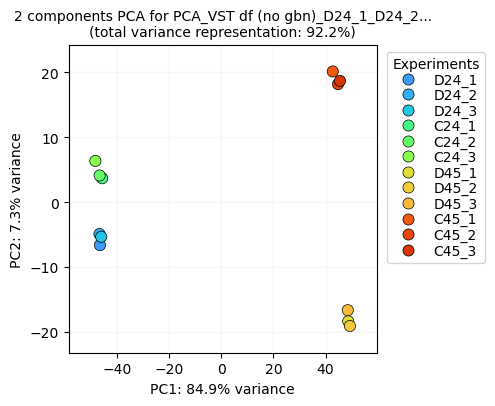

2021-11-10 10:10:59,257 [INFO] - Plotting PCA_explaination_5dc594
2021-11-10 10:10:59,293 [INFO] - Save PCA explanation plot at Plots/PCA/PCA_explaination_5dc594.svg
2021-11-10 10:10:59,331 [INFO] - Save PCA explanation data at Plots/PCA/PCA_explaination_5dc594.xlsx


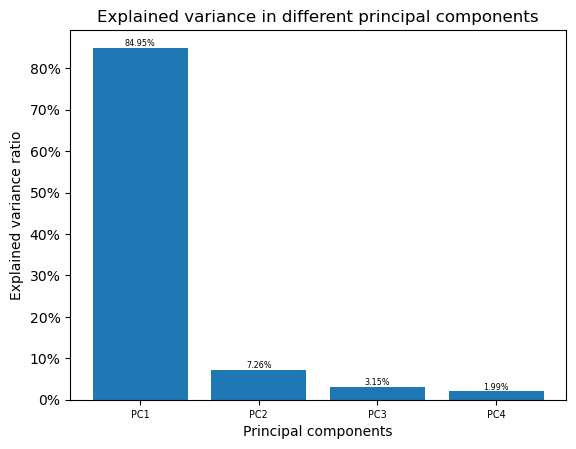

In [4]:
# Remove Gbn from data. The gene has been knockedout from one strain
newVstDf = vstDf[vstDf.index != 'SCO1839']
PcaClass_vst = plotPrincipleAnalysis(newVstDf, colourSet=genColour(vstDf.columns), figsize=(4,4),
                                     title='VST df (no gbn)', analysisType='PCA')
plotPCAExplanation(PcaClass_vst)

2021-11-10 10:10:59,450 [INFO] - Plotting PCA_loading_VST df_95c8c0
2021-11-10 10:11:00,069 [INFO] - Save PCA loading plot at Plots/PCA/PCA_loading_VST dfD24_1_D24_2..._95c8c0.svg
2021-11-10 10:11:01,033 [INFO] - Save PCA loading plot data at Plots/PCA/PCA_loading_VST dfD24_1_D24_2..._95c8c0.xlsx


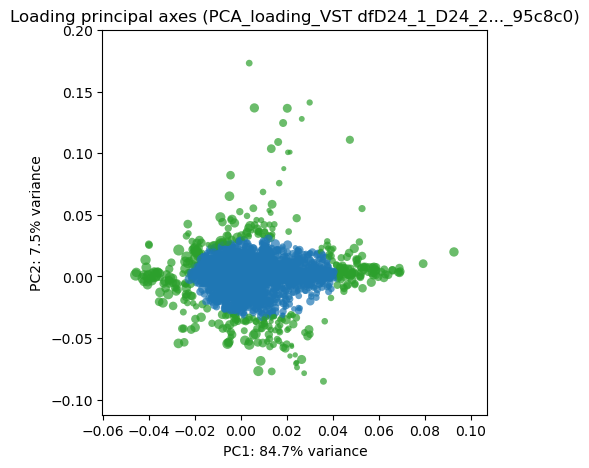

In [5]:
# Loading plot
plotPrincipleAnalysisLoading(vstDf, drawOutliers=True, outlierAlg=0, outliersFraction=0.05, title='VST df')

PLS plot VST

This has similar result as non-supervised PCA.

2021-11-10 10:11:01,776 [INFO] - Plotting PLS plot - VST df_4ec2b1
2021-11-10 10:11:01,914 [INFO] - PLS: Coefficient of determination R^2: 0.9502182495470944
2021-11-10 10:11:01,942 [INFO] - Save PCA plot at Plots/PLS/PLS_VST df_D24_1_D24_2..._4ec2b1.svg
2021-11-10 10:11:02,073 [INFO] - Save PCA data at Plots/PLS/PLS_VST df_D24_1_D24_2..._4ec2b1.xlsx


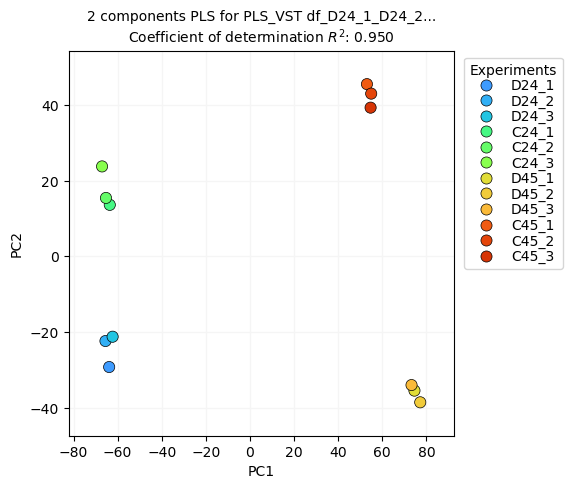

In [6]:
plsClasses = [
              [0,24],
              [0,24],
              [0,24],
              [0,45],
              [0,45],
              [0,45],
              [2,24],
              [2,24],
              [2,24],
              [2,45],
              [2,45],
              [2,45],
]
plsClasses = np.array(plsClasses)

PlsClass_vst = plotPrincipleAnalysis(vstDf,
                                     colourSet=genColour(vstDf.columns),
                                     title='VST df',
                                     analysisType='PLS',
                                     plsClasses=plsClasses)

Correlation plot VST

2021-11-10 10:11:02,290 [INFO] - Save correlation plot at Plots/Correlation/Correlation_D24_1_D24_2b89588.svg
2021-11-10 10:11:02,353 [INFO] - Save correlation data at Plots/Correlation/Correlation_D24_1_D24_2b89588.xlsx


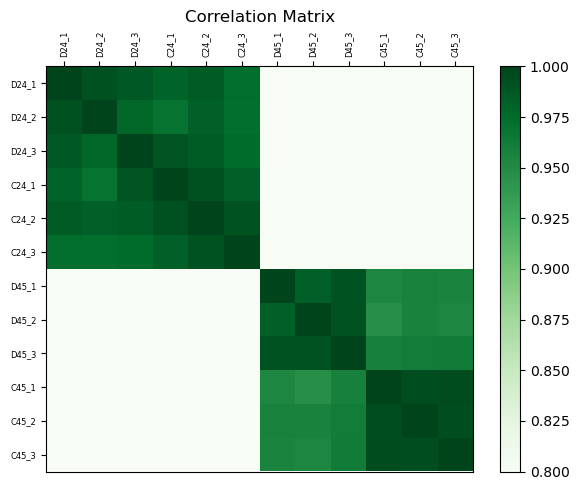

In [7]:
plotCorr(vstDf, vmin=0.8)

Volcano plot for each comparison.

2021-11-10 10:11:02,514 [INFO] - Plotting Volcano_DESeq2_shrink_comp_result_mu_wt24_693bc9
2021-11-10 10:11:02,624 [INFO] - Save volcano figure at Plots/Volcano/Volcano_DESeq2_shrink_comp_result_mu_wt24_693bc9.svg
2021-11-10 10:11:03,679 [INFO] - Save volcano original data at Plots/Volcano/Volcano_DESeq2_shrink_comp_result_mu_wt24_693bc9.xlsx
2021-11-10 10:11:03,680 [INFO] - Save volcano plot data at Plots/Volcano/Volcano_DESeq2_shrink_comp_result_mu_wt24_693bc9_filled.xlsx


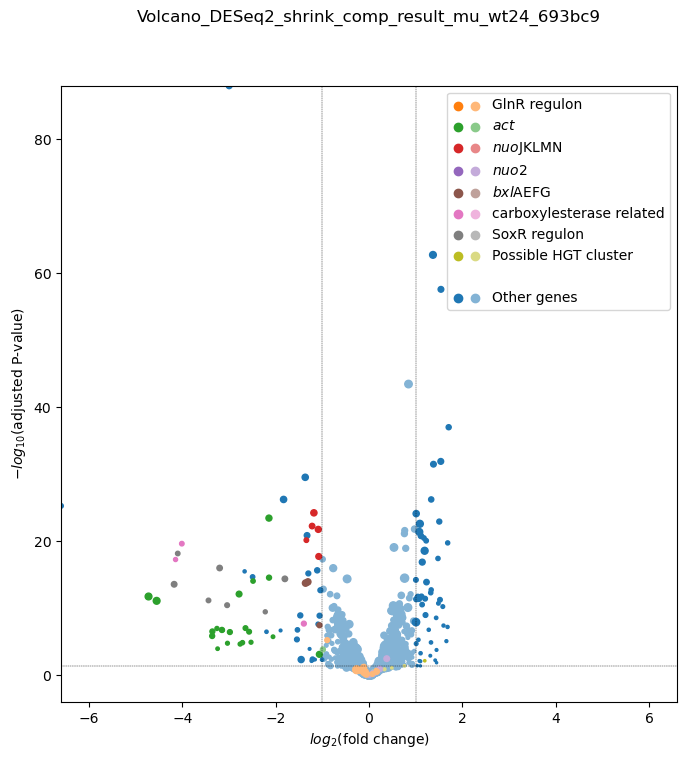

2021-11-10 10:11:05,186 [INFO] - Plotting Volcano_DESeq2_shrink_comp_result_mu_wt45_3c2431
2021-11-10 10:11:05,339 [INFO] - Save volcano figure at Plots/Volcano/Volcano_DESeq2_shrink_comp_result_mu_wt45_3c2431.svg
2021-11-10 10:11:06,498 [INFO] - Save volcano original data at Plots/Volcano/Volcano_DESeq2_shrink_comp_result_mu_wt45_3c2431.xlsx
2021-11-10 10:11:06,498 [INFO] - Save volcano plot data at Plots/Volcano/Volcano_DESeq2_shrink_comp_result_mu_wt45_3c2431_filled.xlsx


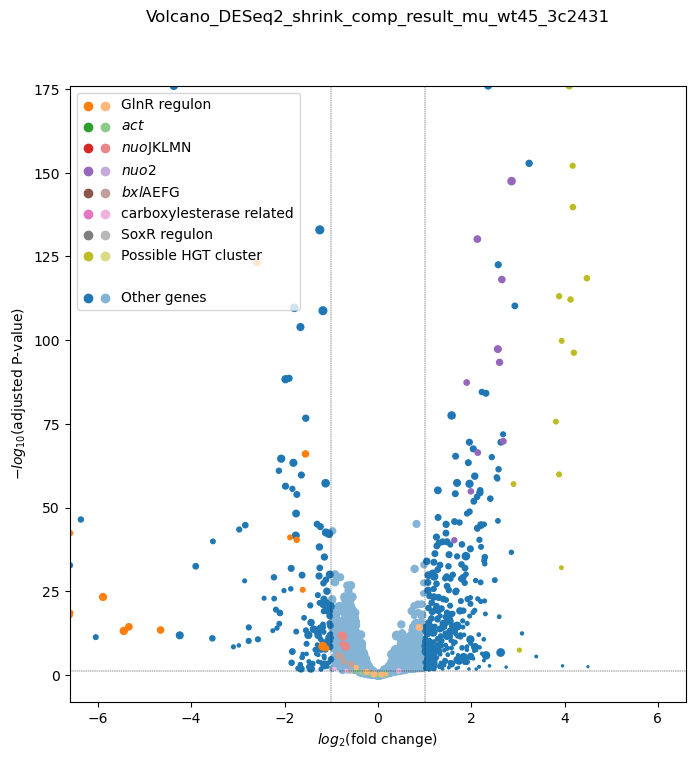

In [8]:
c = 'mu_wt24'
# Columns prepared to get the expression data from vstDf
cols = metaDf[(metaDf.Condition==comparisons[c]['exp']) | \
              (metaDf.Condition==comparisons[c]['ctr'])].Experiment.values
# Genes to be highlighted:
targets = OrderedDict([
    ('GlnR regulon' , ['SCO2198', # glnA
            'SCO5583', 'SCO5584', 'SCO5585', # amtB, glnK, glnD
            'SCO2210', # glnII
            'SCO4683', # gdhA
            'SCO2486','SCO2487', 'SCO2488', # nirB_a, nirB_b, nirCD
            'SCO1236', 'SCO1235', 'SCO1234', 'SCO1233',# ureA, B, C, F
            'SCO0255', 'SCO0888', 'SCO2400', 'SCO2404', 'SCO1863', 'SCO2195', 'SCO7155'
           ]),
    (r'$act$',[f'SCO{i}' for i in range(5071, 5093)]),
    (r'$nuo$JKLMN', [f'SCO{i}' for i in range(4571, 4576)]),
    (r'$nuo2$'  ,[f'SCO{i}' for i in range(4599, 4609)]),
    (r"$bxl$AEFG", [f'SCO{i}' for i in range(7028,7032)]),
    ("carboxylesterase related", [f'SCO0{i}' for i in range(319,322)]),
    ("SoxR regulon", ['SCO4265', 'SCO4266','SCO2477','SCO2478', 'SCO7008', 'SCO1909', 'SCO1178']),
    ('Possible HGT cluster',[f'SCO{i}' for i in range(4615, 4628)]),
#     ('Nit' ,[f'SCO{i}' for i in range(5583, 5586)]),
#     ('Nir' ,[f'SCO{i}' for i in range(2486, 2489)]),
#     ('pGlnr' , ['SCO2471', 'SCO2472', 'SCO2473']),
#     ('Act',[f'SCO{i}' for i in range(5071, 5093)]),
#     ('red',[f'SCO{i}' for i in range(5877, 5899)]),
#     ('cpk',[f'SCO{i}' for i in range(6273, 6289)]),
#     ('whi',[f'SCO{i}' for i in [3034,4543,4767,5621,6029,1950,5314,5315,5316,5317,5318,5319,5320,5321,5819]]),
#     ('bld',[f'SCO{i}' for i in [1489,3323,3549,4091,4768,5112,5113,5114,5115,5116,5723,2792]])
])

plotVolcano(deseq2CompResultsShrink[c], 
            vstDf[cols].mean(axis=1), 
            xmax=6, ymax=80,
            highlights=targets,
            figsize=(8,8),
            title=f'shrink_comp_result_{c}')

c = 'mu_wt45'
cols = metaDf[(metaDf.Condition==comparisons[c]['exp']) | \
              (metaDf.Condition==comparisons[c]['ctr'])].Experiment.values
plotVolcano(deseq2CompResultsShrink[c], 
            vstDf[cols].mean(axis=1), 
            highlights=targets,
            figsize=(8,8),
            xmax = 6, ymax=160,
            title=f'shrink_comp_result_{c}')

---

In [9]:
writeRSessionInfo('RSessionInfo.txt', overwrite=False)

2021-11-10 10:11:08,282 [INFO] - Attached packages in current R session:
Package: DESeq2
Type: Package
Title: Differential gene expression analysis based on the negative
        binomial distribution
Version: 1.32.0
Authors@R: c( person("Michael", "Love",
        email="michaelisaiahlove@gmail.com", role = c("aut","cre")),
        person("Constantin", "Ahlmann-Eltze", role = c("ctb")),
        person("Kwame", "Forbes", role = c("ctb")), person("Simon",
        "Anders", role = c("aut","ctb")), person("Wolfgang", "Huber",
        role = c("aut","ctb")), person("RADIANT EU FP7", role="fnd"),
        person("NIH NHGRI", role="fnd"), person("CZI", role="fnd"))
Maintainer: Michael Love <michaelisaiahlove@gmail.com>
Description: Estimate variance-mean dependence in count data from
        high-throughput sequencing assays and test for differential
        expression based on a model using the negative binomial
        distribution.
License: LGPL (>= 3)
VignetteBuilder: knitr, rmarkdown
Impor

0